# Visualize Unemployment Rate
## Side notes:
I recently have a task to run a jupyter notebook I created for visualization and reporting on regular base. So I created this notebook and I will schedule to run it on regular base later on.<br>
<br>
The data source used in this notebook is static, which is not ideal for my task. But since my main focus to figure out how to schedule a notebook, the latency of the data source is not important. The data was downloaded from Datagov.com website. I am impressed by its data quality and its data formatting. It saves me a lot of time to clean and format the data so that I can indulge myself with visualization. The details of the data can be found here: https://catalog.data.gov/dataset/county-level-data-sets.

In [1]:
import requests
import pandas as pd
import numpy as np
import math
import re
import wget
import os
import shutil

## Extract Data

In [2]:
# Overwrite file if already exists
output = "Unemployment.xls"
url = 'https://www.ers.usda.gov/webdocs/DataFiles/48747/Unemployment.xls?v=9115.7'
file = wget.download(url, "Unemployment.xls")
if os.path.exists(output):
    shutil.move(file,output)

In [3]:
# The first 7 rows are metadata and descriptions of the dataset
unemployment = pd.read_excel('Unemployment.xls', skiprows=7)

In [4]:
unemployment.shape

(3275, 56)

In [5]:
unemployment.head()

,FIPS,State,Area_name,Rural_urban_continuum_code_2013,Urban_influence_code_2013,Metro_2013,Civilian_labor_force_2007,Employed_2007,Unemployed_2007,Unemployment_rate_2007,...,Civilian_labor_force_2017,Employed_2017,Unemployed_2017,Unemployment_rate_2017,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2017,Med_HH_Income_Percent_of_State_Total_2017
0,0,US,United States,NaN,NaN,NaN,152191093.0,145156134.0,7034959.0,4.6,...,160273906.0,153293830.0,6980076.0,4.36,161640488.0,155344043.0,6296445.0,3.9,60336.0,NaN
1,1000,AL,Alabama,NaN,NaN,NaN,2175612.0,2089127.0,86485.0,4.0,...,2178243.0,2081676.0,96567.0,4.40,2198837.0,2112347.0,86490.0,3.9,48193.0,100.0
2,1001,AL,"Autauga County, AL",2.0,2.0,1.0,24383.0,23577.0,806.0,3.3,...,25972.0,24958.0,1014.0,3.90,25957.0,25015.0,942.0,3.6,58343.0,121.1
3,1003,AL,"Baldwin County, AL",3.0,2.0,1.0,82659.0,80099.0,2560.0,3.1,...,92090.0,88342.0,3748.0,4.10,93849.0,90456.0,3393.0,3.6,56607.0,117.5
4,1005,AL,"Barbour County, AL",6.0,6.0,0.0,10334.0,9684.0,650.0,6.3,...,8317.0,7831.0,486.0,5.80,8373.0,7940.0,433.0,5.2,32490.0,67.4


# Format Data

### Filter interested columns

In [6]:
# I am only interested in unemployment rate at this point. Therefore, I will only pull unemployment rate columns from the dataset.
unemployment_rate_cols = [x for x in unemployment.columns if re.match(r'^Unemployment_rate_\d{4}', x,re.I)]
years = [int(col[-4:]) for col in unemployment_rate_cols]

In [7]:
years

[2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

In [8]:
unemployment_rate = unemployment[['FIPS', 'State', 'Area_name'] + unemployment_rate_cols]

In [9]:
unemployment_rate.shape

(3275, 15)

In [10]:
unemployment_rate.head()

,FIPS,State,Area_name,Unemployment_rate_2007,Unemployment_rate_2008,Unemployment_rate_2009,Unemployment_rate_2010,Unemployment_rate_2011,Unemployment_rate_2012,Unemployment_rate_2013,Unemployment_rate_2014,Unemployment_rate_2015,Unemployment_rate_2016,Unemployment_rate_2017,Unemployment_rate_2018
0,0,US,United States,4.6,5.8,9.3,9.63,8.95,8.07,7.38,6.17,5.28,4.87,4.36,3.9
1,1000,AL,Alabama,4.0,5.7,11.0,10.50,9.60,8.00,7.20,6.80,6.10,5.80,4.40,3.9
2,1001,AL,"Autauga County, AL",3.3,5.1,9.7,8.90,8.40,6.90,6.20,5.80,5.20,5.10,3.90,3.6
3,1003,AL,"Baldwin County, AL",3.1,4.6,9.8,10.00,9.00,7.50,6.60,6.10,5.50,5.30,4.10,3.6
4,1005,AL,"Barbour County, AL",6.3,8.8,14.3,12.30,11.50,11.50,10.20,10.50,8.90,8.30,5.80,5.2


### Filter interested rows

In [11]:
# Filter the unemployment rate on the state level
# I noticed states have three trailing zeros in their FIPs. So I use this rule to filter state level data
state_unemployment_rate = unemployment_rate[unemployment_rate['FIPS'].astype(str).str.contains('000$')]

In [12]:
state_unemployment_rate.shape

(52, 15)

## Unpivoting

In [13]:
# Unpivot the data for visualization purpose
state_unemployment_rate_unpvt = \
pd.melt(state_unemployment_rate, 
        id_vars=['FIPS', 'State', 'Area_name'], 
        value_vars=unemployment_rate_cols,
        value_name='Unemployment_rate'
       )
state_unemployment_rate_unpvt['year'] = state_unemployment_rate_unpvt['variable'].str[-4:]\
.astype(int)
state_unemployment_rate_unpvt.drop(columns='variable', inplace=True)

In [14]:
state_unemployment_rate_unpvt.head()

,FIPS,State,Area_name,Unemployment_rate,year
0,1000,AL,Alabama,4.0,2007
1,2000,AK,Alaska,6.3,2007
2,4000,AZ,Arizona,3.9,2007
3,5000,AR,Arkansas,5.3,2007
4,6000,CA,California,5.4,2007


In [15]:
state_unemployment_rate_unpvt.year.value_counts().sort_index()

2007    52
2008    52
2009    52
2010    52
2011    52
2012    52
2013    52
2014    52
2015    52
2016    52
2017    52
2018    52
Name: year, dtype: int64

## Visualization

I used plotly to visualize unemployment rate by state over the past 12 years.<br>
<br>
Thanks to Julia Poncela-Casasnovas, I followed her blog posted on https://amaral.northwestern.edu/blog/step-step-how-plot-map-slider-represent-time-evolu

In [16]:
import plotly

import plotly.graph_objs as go

import plotly.offline as offline

from plotly.graph_objs import *

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

from matplotlib import cm

import matplotlib

init_notebook_mode(connected=True)

### Let's plot unemployment rate of 2018 first

In [17]:
state_unemployment_rate_2018 = state_unemployment_rate_unpvt.query('year==2018').copy()
state_unemployment_rate_2018.shape

(52, 5)

In [18]:
state_unemployment_rate_2018['text']= state_unemployment_rate_2018['Area_name']

In [19]:
data = [ dict(
            type='choropleth', # type of map-plot
            colorscale = 'Blues',
            autocolorscale = False,
            locations = state_unemployment_rate_2018['State'], # the column with the state
            z = state_unemployment_rate_2018['Unemployment_rate'].astype(float), # the variable I want to color-code
            locationmode = 'USA-states',
            text = state_unemployment_rate_2018['text'], # hover text
            marker = dict(     # for the lines separating states
                        line = dict (
                                  color = 'rgb(255,255,255)', 
                                  width = 2) ),               
            colorbar = dict(
                        title = "Unemployment Rate")
            ) 
       ]

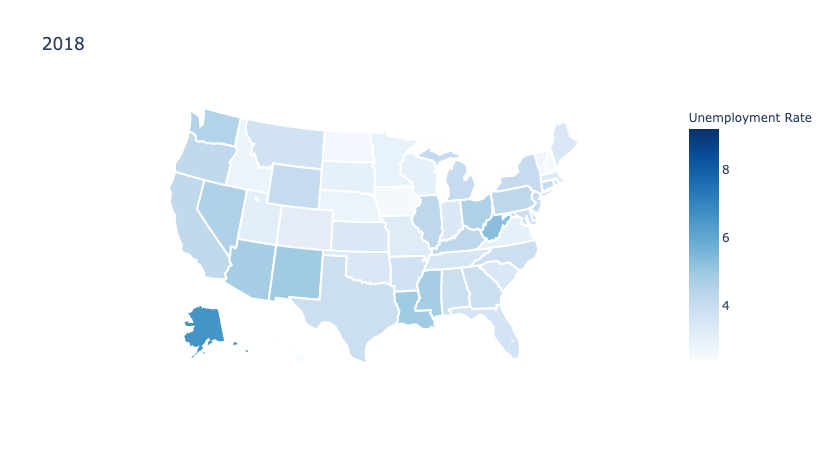

In [20]:
layout = dict(
        title = '2018',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),

#              showlakes = True,  # if you want to give color to the lakes

#             lakecolor = 'rgb(73, 216, 230)'  
            ),
             )

fig = dict( data=data, layout=layout )

plotly.offline.iplot(fig)

### Adding Slider Bar
In order to view the changes over years, we are going to add slider bar.

In [21]:
### create empty list for data object:    

data_slider = []
years = []

for year, group in state_unemployment_rate_unpvt.groupby('year'):
    years.append(year)
    data_one_year = dict(
                        type='choropleth',
                        locations = group['State'],
                        z=group['Unemployment_rate'].astype(float),
                        locationmode='USA-states',
                        colorscale = 'Blues',
                        text = state_unemployment_rate_unpvt['Area_name'],
                        )
    data_slider.append(data_one_year)  # I add the dictionary to the list of dictionaries for the slider

In [22]:
##  I create the steps for the slider

steps = []

for i in range(len(data_slider)):
    step = dict(method='restyle',
                args=['visible', [False] * len(data_slider)],
                label='Year {}'.format(years[i])) # label to be displayed for each step (year)
    step['args'][1][i] = True
    steps.append(step)
    
##  I create the 'sliders' object from the 'steps' 

sliders = [dict(active=0, pad={"t": 1}, steps=steps)] 

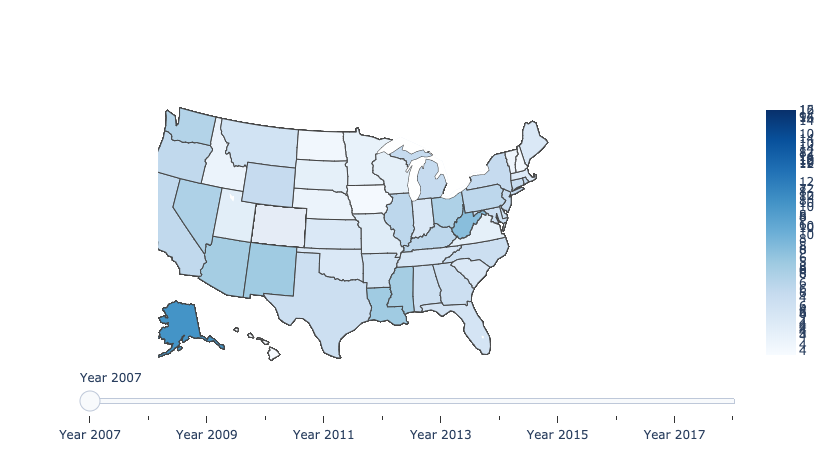

In [23]:
# I set up the layout (including slider option)

layout = dict(geo=dict(scope='usa',
                       projection={'type': 'albers usa'}),
              sliders=sliders)

# I create the figure object:

fig = dict(data=data_slider, layout=layout) 


# to plot in the notebook

plotly.offline.iplot(fig)


# # to plot in a separete browser window

# offline.plot(fig, auto_open=True, image = 'png', image_filename="map_us_crime_slider" ,
#              image_width=2000, image_height=1000, 
#               filename='/your_path/map_us_crime_slider.html', validate=True


I noticed the scale of the colorbar will be automatically adjusted based on the current year's data. In order to have the same colorbar cross the year, we need to add bound to unemployment rate.

### Adding bound to the colors
Let's first find out the minimum and maximum unemployment rate in the history

In [24]:
rate_min = math.ceil(state_unemployment_rate_unpvt.Unemployment_rate.min()) - 1
rate_max = math.ceil(state_unemployment_rate_unpvt.Unemployment_rate.max())
rate_min, rate_max

(2, 17)

In [25]:
### create empty list for data object:    

data_slider = []
years = []

for year, group in state_unemployment_rate_unpvt.groupby('year'):
    years.append(year)
    data_one_year = dict(
                        type='choropleth',
                        locations = group['State'],
                        z=group['Unemployment_rate'].astype(float),
                        locationmode='USA-states',
                        colorscale = 'Blues',
                        zmin=rate_min,
                        zmax=rate_max
                        
                        )
    data_slider.append(data_one_year)  
    # I add the dictionary to the list of dictionaries for the slider

In [26]:
##  I create the steps for the slider

steps = []

for i in range(len(data_slider)):
    step = dict(method='restyle',
                args=['visible', [False] * len(data_slider)],
                label='Year {}'.format(years[i])) # label to be displayed for each step (year)
    step['args'][1][i] = True
    steps.append(step)
    
##  I create the 'sliders' object from the 'steps' 

sliders = [dict(active=0, pad={"t": 1}, steps=steps)] 

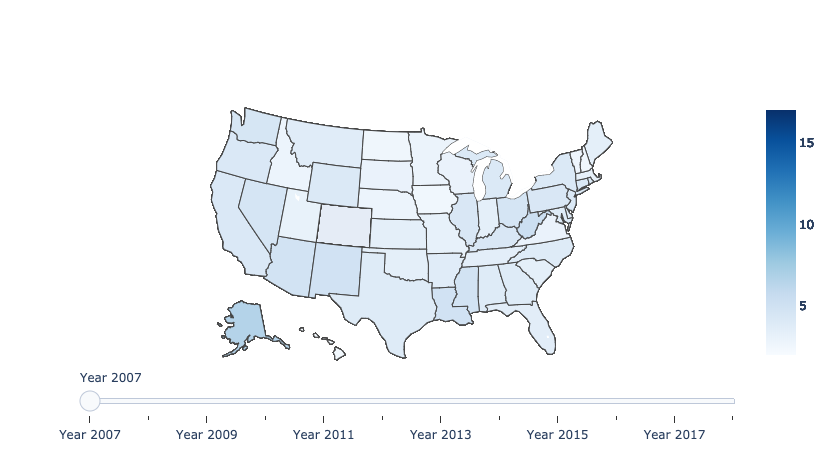

In [27]:
# I set up the layout (including slider option)

layout = dict(geo=dict(scope='usa',
                       projection={'type': 'albers usa'}),
              sliders=sliders)

# I create the figure object:

fig = dict(data=data_slider, layout=layout) 


# to plot in the notebook

plotly.offline.iplot(fig)


In [28]:
offline.plot(fig, auto_open=True, image = 'png', image_filename="map_us_unemployment_slider",
            image_width=2000, image_height=1000, 
            filename='map_us_unemployment_slider.html', validate=True)

'map_us_unemployment_slider.html'

While playing with the slider, I noticed the unemployment rate is highest in 2010, two years after financial crisis.